# Time Series Analysis
Samar Amini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

from prophet import Prophet
from sklearn.metrics import mean_absolute_error as mae
import datetime as dt

In [2]:
import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [3]:
DF = pd.read_csv('../Data/incoming_packages.csv')

## Reading the data

In [4]:
DF.head()

,date,total_packages,cooled_packages,fire_packages,normal_packages
0,2020-01-01,1745,370,488,887
1,2020-01-02,1847,308,402,1137
2,2020-01-03,1842,314,394,1134
3,2020-01-04,664,131,181,352
4,2020-01-05,871,137,190,544


In [5]:
df = DF[['date','total_packages']]

In [6]:
df.head()

,date,total_packages
0,2020-01-01,1745
1,2020-01-02,1847
2,2020-01-03,1842
3,2020-01-04,664
4,2020-01-05,871


## Analysing the data

In [6]:
df.shape

(851, 2)

<AxesSubplot:>

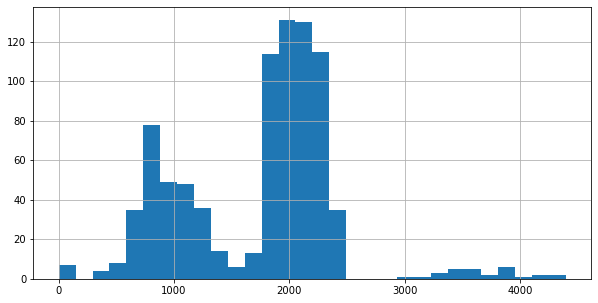

In [7]:
df.total_packages.hist(bins=30)

([<matplotlib.axis.XTick at 0x188c4fab790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

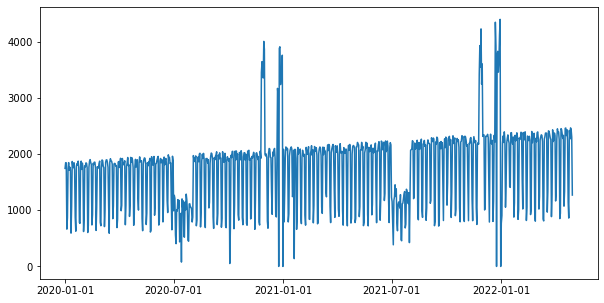

In [8]:
plt.plot(df.date,df.total_packages)
plt.xticks(['2020-01-01','2020-07-01','2021-01-01','2021-07-01','2022-01-01'])

In [11]:
df.loc[df['total_packages']<200]

,date,total_packages
195,2020-07-14,78
276,2020-10-03,52
358,2020-12-24,0
365,2020-12-31,0
384,2021-01-19,139
723,2021-12-24,0
730,2021-12-31,0


Text(0.5, 1.0, 'Total_package variations for a period of 100 days')

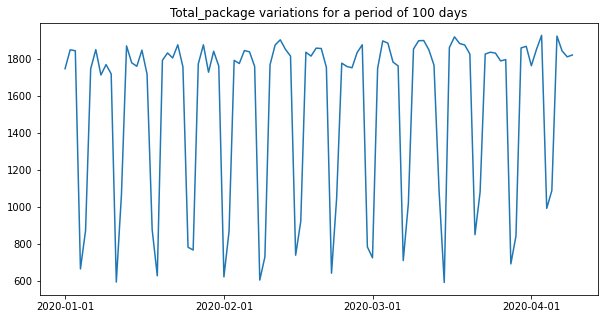

In [9]:
## ploting the first 100 days

plt.plot(df.iloc[0:100,0],df.iloc[0:100,1])
plt.xticks(['2020-01-01','2020-02-01','2020-03-01','2020-04-01'])
plt.title('Total_package variations for a period of 100 days')

#### Finns det något säsongsvariation? I så fall, vilka?
#### Det finns spikar i november och december, vad kan det bero på?
> I can see seasonality component which repeats weekly, as it is recognisable in the plot for 100 days duration.
> I can also see sharp variations in July, November and December-January, which repeats every year. So I think we can call it seasonal variations as well. The peaks in November and december shpuld be due to the Black-friday and Chritmass presents, accordingly. The drops in July and January should be affected by the Summer and New-year holidays.
#### Finns det någon trend?
> Dataset presents an upward trend.
#### Finns det några dagar med extrema värden?
> Not extreme values if we do not mean the peaks in December, but I see irregularities on '2020-10-03' and '2021-01-19' which are unusually lower than their neighboring days and they do not repeat in the other years.


## Train a Model

In [7]:
PM = Prophet()

In [8]:
df['ds'] = df['date']
df['y'] = df['total_packages']

In [9]:
df.head()

,date,total_packages,ds,y
0,2020-01-01,1745,2020-01-01,1745
1,2020-01-02,1847,2020-01-02,1847
2,2020-01-03,1842,2020-01-03,1842
3,2020-01-04,664,2020-01-04,664
4,2020-01-05,871,2020-01-05,871


In [10]:
train1 = df[df['date']<'2022-04-01']
train1.tail()

,date,total_packages,ds,y
816,2022-03-27,1284,2022-03-27,1284
817,2022-03-28,2431,2022-03-28,2431
818,2022-03-29,2223,2022-03-29,2223
819,2022-03-30,2260,2022-03-30,2260
820,2022-03-31,2374,2022-03-31,2374


In [11]:
test1 = df[df['date']>='2022-04-01']
test1.head()

,date,total_packages,ds,y
821,2022-04-01,2329,2022-04-01,2329
822,2022-04-02,1165,2022-04-02,1165
823,2022-04-03,1337,2022-04-03,1337
824,2022-04-04,2272,2022-04-04,2272
825,2022-04-05,2449,2022-04-05,2449


In [12]:
PM.fit(train1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Predict the future

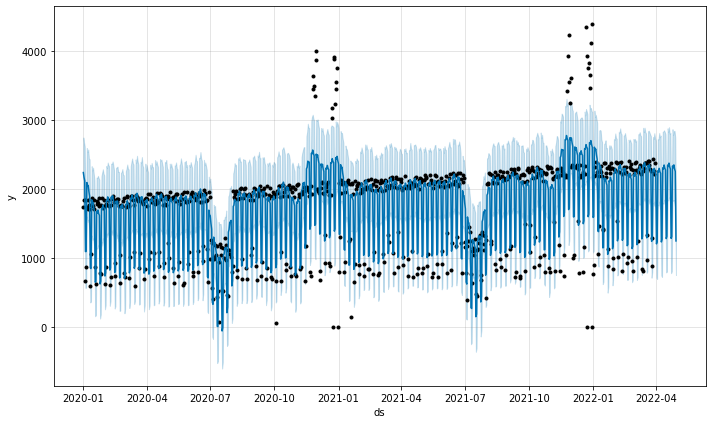

In [21]:
future1 = PM.make_future_dataframe(periods=30)
Predict0 = PM.predict(future1)
Predict = PM.predict(test1)     
fig1 = PM.plot(Predict0)


In [22]:
Predict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
25,2022-04-26,1989.739795,1804.163698,2840.128525,1989.739545,1989.739999,318.261410,318.261410,318.261410,287.906119,287.906119,287.906119,30.355291,30.355291,30.355291,0.0,0.0,0.0,2308.001205
26,2022-04-27,1990.344945,1849.360970,2834.699391,1990.344679,1990.345180,360.267053,360.267053,360.267053,336.260194,336.260194,336.260194,24.006859,24.006859,24.006859,0.0,0.0,0.0,2350.611998
27,2022-04-28,1990.950096,1774.187866,2787.036762,1990.949808,1990.950344,299.819326,299.819326,299.819326,282.368340,282.368340,282.368340,17.450986,17.450986,17.450986,0.0,0.0,0.0,2290.769422
28,2022-04-29,1991.555247,1723.876998,2783.879093,1991.554933,1991.555512,264.432054,264.432054,264.432054,253.534464,253.534464,253.534464,10.897591,10.897591,10.897591,0.0,0.0,0.0,2255.987301
29,2022-04-30,1992.160397,721.007814,1744.808528,1992.160069,1992.160682,-744.206705,-744.206705,-744.206705,-748.757739,-748.757739,-748.757739,4.551033,4.551033,4.551033,0.0,0.0,0.0,1247.953692


#### Hur modellen har prognostiserat träningsdatan ??
> To see that, I compare the test data with the predicted ones in the plot below.
#### Vad ser vi i grafen?
● Svarta punkter --> Observed data, i.e. input datapoints </br>
● Mörkblå linje --> yhat values i.e. predictions </br>
● Ljusblå linje --> yhat_upper and yhat_lower i.e. uncertainity intervals


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

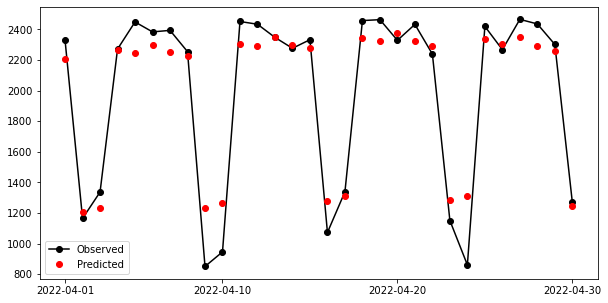

In [23]:
### Ploting test data and presictions for that

tickvalues = ['2022-04-01','2022-04-10','2022-04-20','2022-04-30']
plt.plot(test1.ds,test1.y,'-ok', label='Observed')
plt.plot(Predict['ds'].dt.strftime("%Y-%m-%d"),Predict.yhat,'or' , label='Predicted')
plt.xticks(['2022-04-01','2022-04-10','2022-04-20','2022-04-30'])
plt.legend()
plt.show()

#### Kör modellen mot testdatan och se om den presterar bättre än planeringen på 2000 paket om dagen 

In [17]:
## Calculating mean absolute error
plan = 0
for k in range(len(test1.ds)):
    plan += abs( (test1.y.iloc[k] - 2000) )
    
diffPlan = plan/len(test1.ds)
print(plan)
print(diffPlan)

15749
524.9666666666667


In [18]:
## or using mean_absolute_error from sklearn package

p = 2000 * np.ones(len(test1.y), dtype=int)
error = mae(test1.y,p)
error

524.9666666666667

#### För att jämföra modellen med ursprungliga planeringen ska AME (absolute mean error) användas

In [19]:
## calculating AME

AME = 0
j = 0
for i in test1.ds:
    ix = Predict.loc[Predict['ds'] == i] 
    AME += abs(test1.y.iloc[j] - ix.yhat.values) 
    j = j+1
    
AME = AME[0]
print("Absolute Mean Error: ", AME/(j-1))

Absolute Mean Error:  121.54579580482843


#### Rita ut modellens komponenter (trend och säsongsvariation)

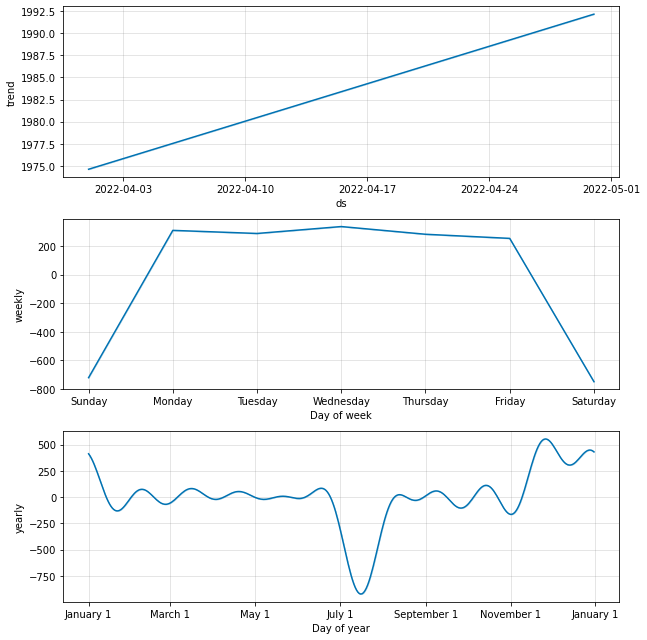

In [24]:
fig2 = PM.plot_components(Predict)
plt.show()

#### Gör en prognostisering för Juni 2022 och rita ut.


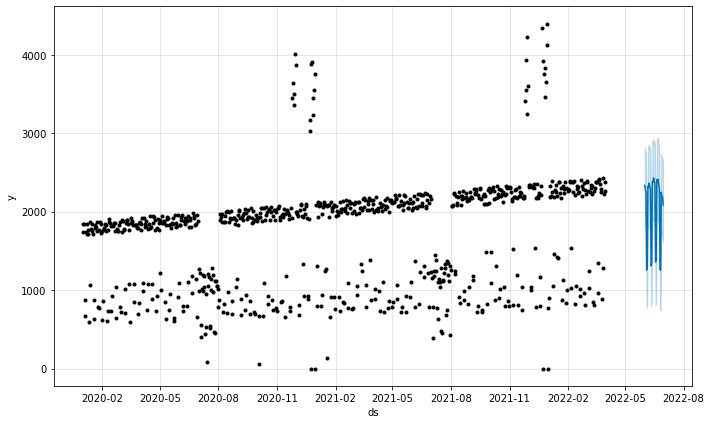

In [34]:
Juni22 = PM.make_future_dataframe(periods=91)
pred_Juni22 = PM.predict(Juni22)

## prediction for Only June:
Juni = Juni22.loc[Juni22['ds']>='2022-06-01']
pred_Juni = PM.predict(Juni)
fig3 = PM.plot(pred_Juni)

Text(0.5, 1.0, 'Total_Packages prediction for June 2022 SAMAR')

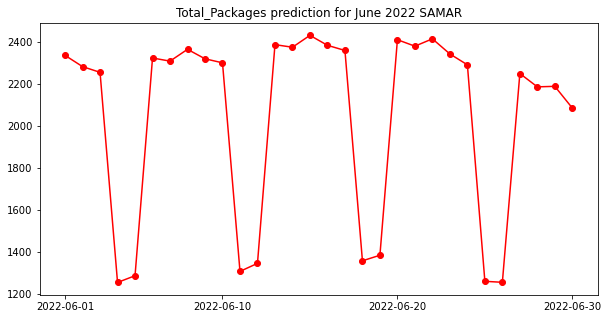

In [54]:
## Plotting predictions for June

plt.plot(pred_Juni.ds,pred_Juni.yhat,'-or' , label='Predicted')
plt.xticks(['2022-06-01','2022-06-10','2022-06-20','2022-06-30'])
plt.title('Total_Packages prediction for June 2022 %s')

## VG delen

#### Träna ytterligare tre facebook prophet modeller.
- En för normala paket.
- En för kylda paket.
- En för brandfarliga paket.
- Prognostiseringen för totala antalet paket ska användas som input för varje
modell.

●  Varje modell ska tränas på data före 2022-04-01 och testas på data från 2022-04-01.
#### För varje modell ska följande göras </br>
- Räkna ut medelvärdet av fel för varje dag i testdatan </br>
  (Här har företaget inget eget värde att jämföra mot)
- Rita ut modellens komponenter (trend och säsongsvariation)
- Gör en prognostisering för Juni 2022 och rita ut

In [59]:
def ModelProphet(Data,Y):
    Model = Prophet()
    Data['total_predictions']= Predict0['yhat']
    Model.add_regressor('total_predictions')
    Data['ds'] = Data['date']
    Data['y'] = Data[Y]
    train = Data[Data['date']<'2022-04-01']
    test = Data[Data['date']>='2022-04-01']
    
    ## Fitting the model
    Model.fit(train)
    future = Model.make_future_dataframe(periods=30)
    future['total_predictions'] = Data['total_predictions']
    Predict_0 = Model.predict(future)
    Predict1 = Model.predict(test)
    fig = Model.plot(Predict0)
    plt.title('Prophet Model for %s' %Y)
    plt.show()
    
    ## Plotting testdata and predistions
    plt.plot(test.ds, test.y,'-ok', label='Observed')
    plt.plot(Predict1['ds'].dt.strftime("%Y-%m-%d"), Predict1.yhat,'or' , label='Predicted')
    plt.xticks(['2022-04-01','2022-04-10','2022-04-20','2022-04-30'])
    plt.legend()
    plt.title('Test data and Predicted values for %s' %Y)
    plt.show()
    
    ## Calculating mean_error
    MAE = 0
    j = 0
    for i in test1.ds:
        ix = Predict1.loc[Predict1['ds'] == i] 
        MAE = MAE + abs( test.y.iloc[j] - ix.yhat.values )
        j = j+1
    MAE = MAE[0]
    print()
    print("*******************")
    print("Absolute Mean Error for",Y, ": ", MAE/(j-1))
    print("*******************")
    print()
    
    ## Plotting model components
    print('            ---- Model components for %s----' %Y)
    fig = Model.plot_components(Predict)
    plt.show()
    
    ## running a prediction for June 2022
    Juni22 = Model.make_future_dataframe(periods=91)
    Juni22['total_predictions'] = pred_Juni22['yhat']
    Juni = Juni22.loc[Juni22['ds']>='2022-06-01']
    PredJuni = Model.predict(Juni)
    fig = Model.plot(PredJuni)
    plt.title('Model for Jun 2022 for %s' %Y)
    plt.show()
    
    ## Plotting predictions for June
    plt.plot(PredJuni.ds,PredJuni.yhat,'-or' , label='Predicted')
    plt.xticks(['2022-06-01','2022-06-10','2022-06-20','2022-06-30'])
    plt.title('Test data and Predictions for June 2022 for %s' %Y)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


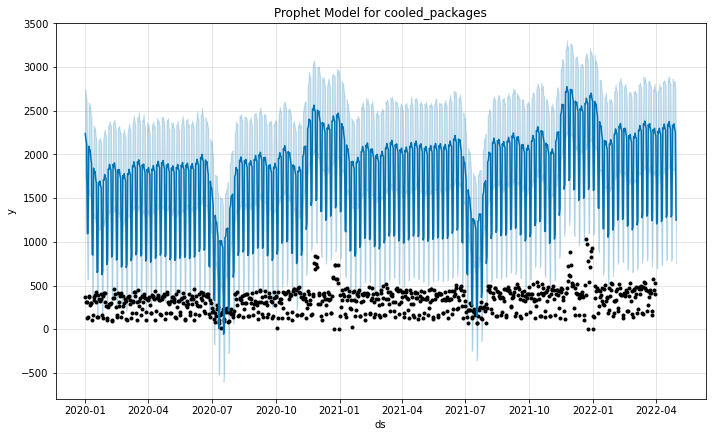

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

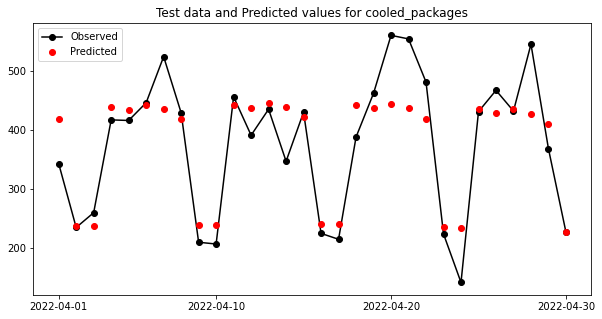


*******************
Absolute Mean Error for cooled_packages :  41.478179569097684
*******************

---- Model components ----


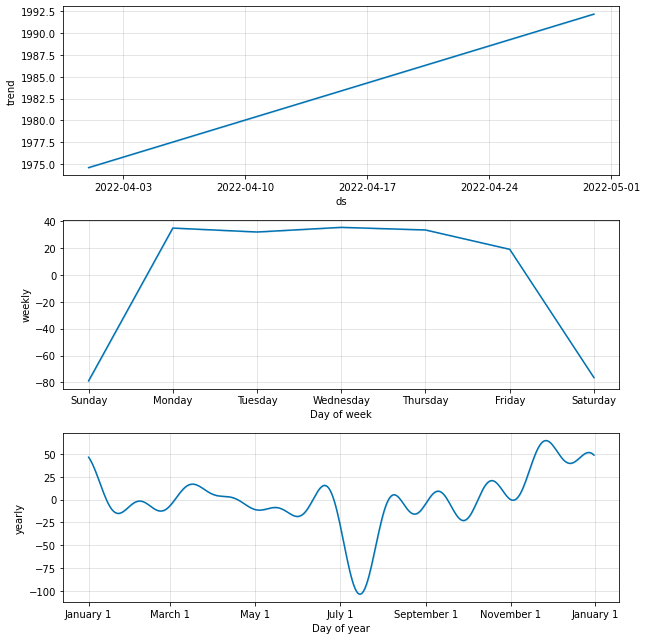

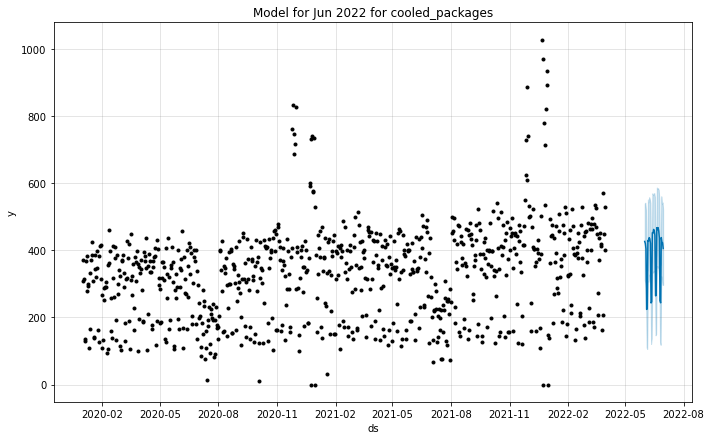

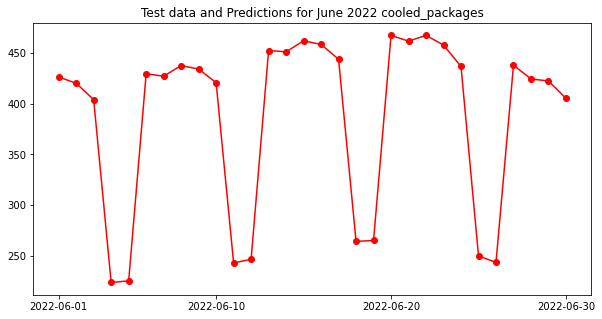

In [56]:
ModelProphet(DF,'cooled_packages')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


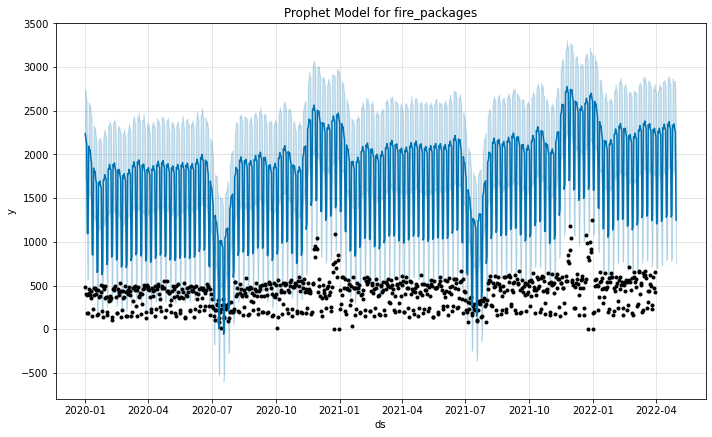

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

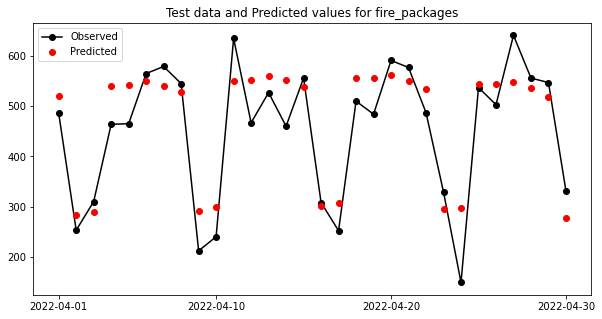


*******************
Absolute Mean Error for fire_packages :  50.72703731159331
*******************

---- Model components ----


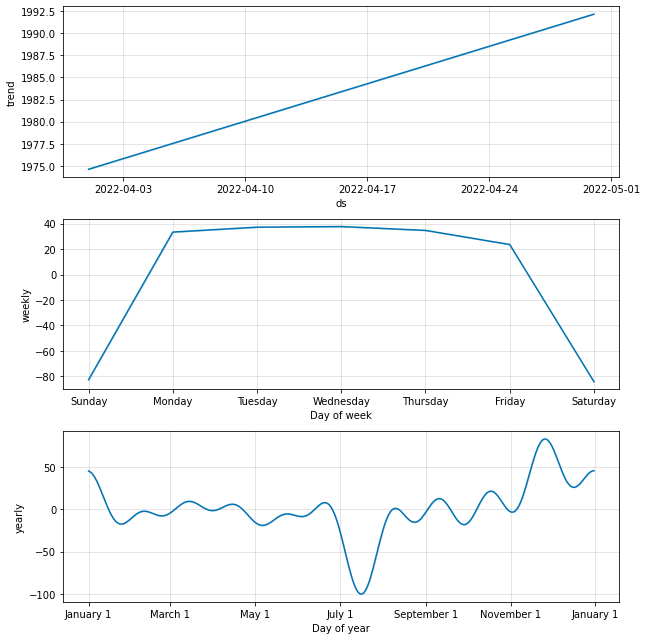

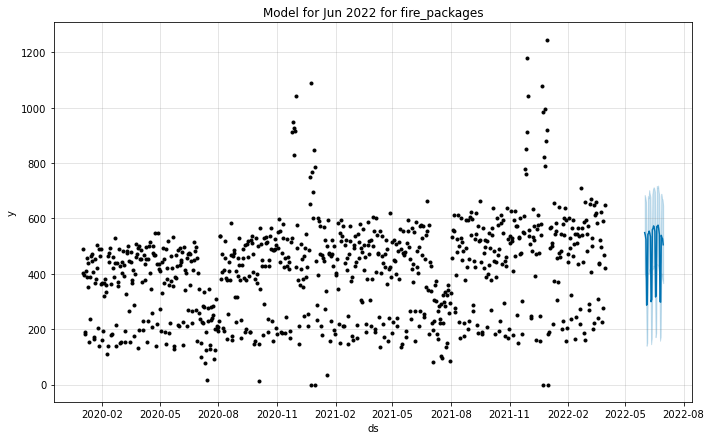

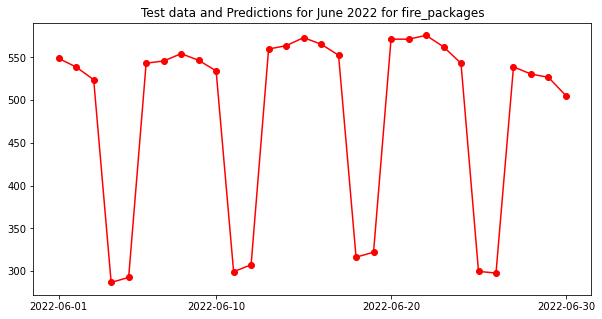

In [58]:
ModelProphet(DF,'fire_packages')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


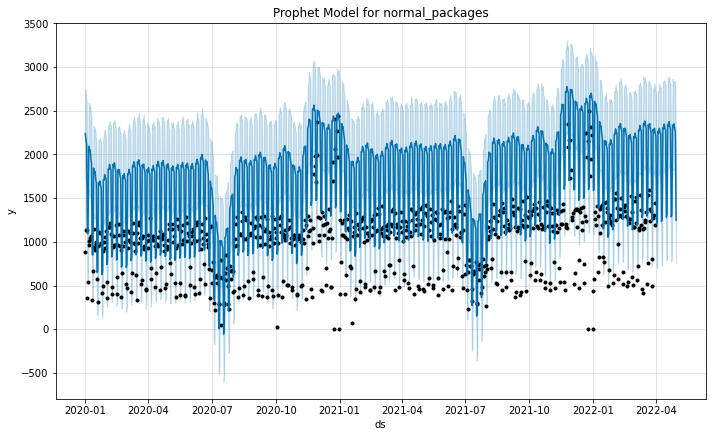

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

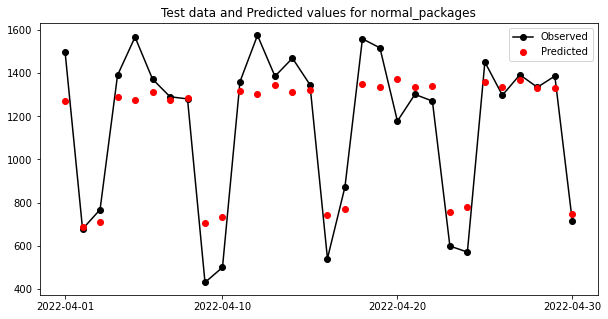


*******************
Absolute Mean Error for normal_packages :  118.35284329678733
*******************

            ---- Model components for normal_packages----


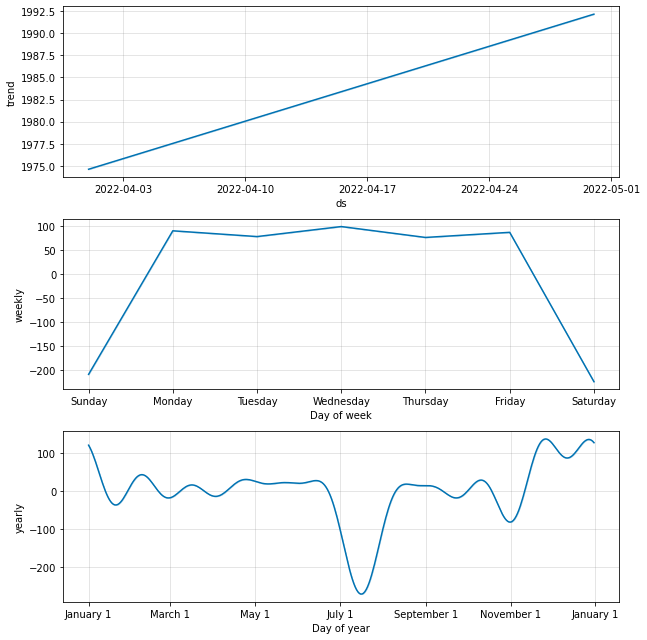

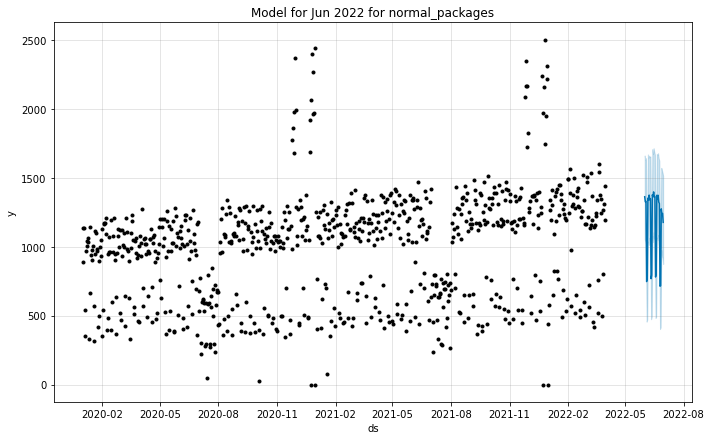

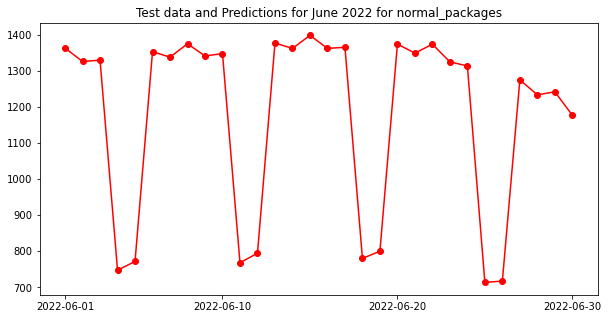

In [60]:
ModelProphet(DF,'normal_packages')

In [46]:
Errors = pd.DataFrame({'Package_type':['total_packages', 'cooled_packages', 'fire_packages', 'normal_packages'],
                       'MAE':[121.5, 41.5, 50.7, 118.3]})
Errors

,Package_type,MAE
0,total_packages,121.5
1,cooled_packages,41.5
2,fire_packages,50.7
3,normal_packages,118.3


End :)